In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria entre 0 y 1
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide (usando la salida de la sigmoide)
        return x * (1 - x)

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):
        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):
                inputs = X_train[i]
                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)
                # Calcular el error
                error = Y_train[i] - prediction
                train_error_acum += error ** 2  # Aquí se acumula el cuadrado del error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                self.weights += learning_rate * error * self.sigmoid_derivative(prediction) * inputs
                self.bias += learning_rate * error * self.sigmoid_derivative(prediction)

            # Calcular el error promedio por epoch
            train_error_by_epoch.append(train_error_acum / X_train.shape[0])

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)
                error = Y_validation[i] - prediction
                val_error_acum += error ** 2

            # Calcular el error promedio de validación por epoch
            val_error_by_epoch.append(val_error_acum / X_validation.shape[0])

            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_by_epoch[-1], '| val error:', val_error_by_epoch[-1])

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b', label='Error de entrenamiento')
        plt.plot(range(epochs), val_error_by_epoch, '-r', label='Error de validación')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento y Validación por Epoch')
        plt.legend()
        plt.show()


In [2]:
# Crear y entrenar el perceptrón para la puerta AND
N_samples = 5000  # Número total de muestras, debe ser múltiplo de 4
N_inputs = 2  # Número de entradas para la puerta AND
train_size = 0.8  # 80% de los datos para entrenamiento

N_validation = int((1 - train_size) * N_samples)

# Generar todas las combinaciones posibles para la puerta AND
X_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_data = np.array([0, 0, 0, 1])

# Repetir las combinaciones para alcanzar el número deseado de muestras
X_data = np.tile(X_data, (N_samples // 4, 1))
Y_data = np.repeat(Y_data, N_samples // 4)

# Mezclar los datos
indices = np.arange(N_samples)
np.random.shuffle(indices)
X_data = X_data[indices]
Y_data = Y_data[indices]

# Dividir los datos en entrenamiento y validación
X_train = X_data[:int(train_size * N_samples)]
Y_train = Y_data[:int(train_size * N_samples)]

X_validation = X_data[int(train_size * N_samples):]
Y_validation = Y_data[int(train_size * N_samples):]

# Visualizar algunas muestras
print("X_train (first 5 samples):")
print(X_train[:5])

print("Y_train (first 5 samples):")
print(Y_train[:5])

X_train (first 5 samples):
[[0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 1]]
Y_train (first 5 samples):
[0 1 0 0 0]


In [3]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

epoch: 0 | train error: 0.1917043592837307 | val error: 0.19353061197917873
epoch: 10 | train error: 0.1868831620244918 | val error: 0.1935681091003219
epoch: 20 | train error: 0.18688316202446598 | val error: 0.19356810910034483
epoch: 30 | train error: 0.18688316202446598 | val error: 0.19356810910034483
epoch: 40 | train error: 0.18688316202446598 | val error: 0.19356810910034483
epoch: 50 | train error: 0.18688316202446598 | val error: 0.19356810910034483
epoch: 60 | train error: 0.18688316202446598 | val error: 0.19356810910034483
epoch: 70 | train error: 0.18688316202446598 | val error: 0.19356810910034483
epoch: 80 | train error: 0.18688316202446598 | val error: 0.19356810910034483
epoch: 90 | train error: 0.18688316202446598 | val error: 0.19356810910034483


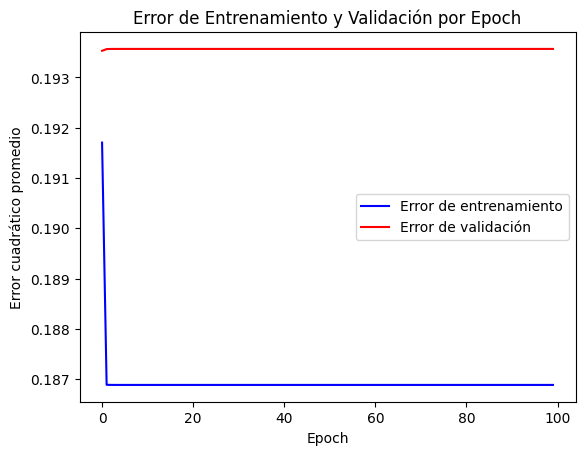

In [4]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

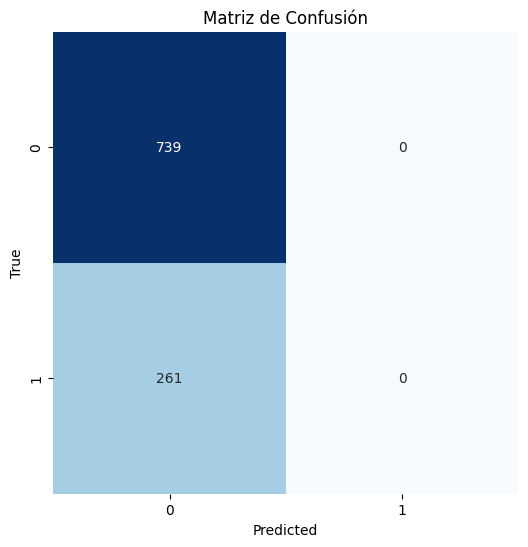

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Supongamos que 'model' es tu modelo de perceptrón ya entrenado
# Reemplaza 'model' con el nombre de tu variable de modelo si es diferente

# Generar las predicciones para el conjunto de validación
Y_pred = np.round(perceptron_and.predict(X_validation))

# Calcular la matriz de confusión
conf_mat = confusion_matrix(Y_validation, Y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()

